# Capstone | Churn Analysis 

## Small Business | Tax Office Insights

* Student name: Miguel Santana
* Student pace: Full Time
* Scheduled project review date/time: 11/28/2020, 2 PM
* Instructor name: James Irving
* Blog post: [Medium](https://msantana269.medium.com/clustering-customer-churn-time-series-b51c9f59d691)

Follow the notebooks and analysis in the following order:

1) Data_Cleaning.ipynb

2) Clustering.ipynb

3) Customer_Churn.ipynb

## Abstract

Through data exploration and analysis of clientele data over a three-year period, recommendations for business development are provided below. The three sections of our analysis are provided in the following notebooks: Data_Cleaning.ipynb, Clustering.ipynb and Customer_Churn.ipynb. The most significant loss for the office occurs in clients between the ages of 25 and 35 coming from single income households. Our analysis outlines strategies for targeted marketing and customer retention. 

## Methodology
A business owner has tasked our team with analyzing their client base in order to understand customer retention as they run a seasonal tax business. COVID-19 has severely compromised their ability to have face to face interactions with customers and this has been a long standing cornerstone of their business layout. Machine learning and deep learning algorithms will be used in order to process this request. Predictive models will offer the business owner key insight to be used in their end of year business meetings as they plan for the upcoming tax season. 

## Framework
The OSEMN framework will be used to navigate the project, models and interpretations culminating in actionable business recommendations. 

The OSEMN Framework

* Obtain  
* Scrub ('Data_Cleaning.ipynb')
* Explore 
* Model 
* Interpret

## Importing Packages

In [1]:
# Packages for cleaning, processing, visualizing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('mode.chained_assignment', None)
plt.style.use('seaborn-poster') 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Plotly Visualizations
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For offline use
cf.go_offline()

# OBTAIN
### Importing Data | Tax Returns

In [3]:
df = pd.read_csv('taxdata.csv', index_col='LastDate', parse_dates=True)

In [4]:
# Initial data observations
print(df.shape)

(1467, 31)


### Verifying Null Data

In [5]:
print('Missing Values : ', df.isnull().sum().values.sum()) # null values
# print('Missing Values: \n', df.isna().sum()) # unique values per column

Missing Values :  0


# SCRUB
#### Please see 'Data_Cleaning.ipynb' for preliminary data cleaning and 'Clustering.ipynb' for customer customer segmentation analysis.

## Simplifying Data Frame
#### Representative of customer's last electronic filing transaction at the tax office

## Cleaning Columns
#### Binning The Age Column

In [6]:
# Binning age values for visual
df['Age_bin'] = df['Age'].apply(lambda x: '18-20' if x < 20 
                                else '20-30' if x < 30 
                                else '30-40' if x < 40 
                                else '40-50' if x < 50 
                                else '50-60' if x < 60 
                                else '60-70' if x < 70 
                                else '70+')

#### Cleaning Numerical Columns

In [7]:
# Converting numerical values to integers
for num_cols in df.select_dtypes('number').columns: df[num_cols] = df[num_cols].astype(int)

#### Regional Columns

In [8]:
statevals = {'AZ':'ARIZONA','CA':'CALIFORNIA','NV':'NEVADA','LA':'LOUISIANA',
             'DC':'DISTRICT OF COLUMBIA','OR':'OREGON'}

df['State'] = df['State'].replace(statevals)

In [9]:
total = len(df)
yuma = len(df[df['County'] == 'YUMA'])
percent = yuma/total
print('The client base is primarily in the City/County of Yuma. Of the clients, {} reside in Yuma County. As a result, the regional columns will be dropped.'.format(percent))

The client base is primarily in the City/County of Yuma. Of the clients, 0.9475119291070211 reside in Yuma County. As a result, the regional columns will be dropped.


#### Simplifying Data Frame

In [10]:
df = df[['FamSize', 'ID', 'Gender', 'Age', 'City', 'State', 'County', 'Email', 
         'Occupation', 'Household_Income', 'Efile16', 'Paid16', 'Efile17', 'Paid17', 
         'Efile18', 'Paid18', 'Preparer', 'FedTax', 'AGI', 'Fee', 'Paid', 'LastEfileDate', 
         'Month', 'Day', 'Customer_Churn', 'Age_bin']]

In [11]:
df = df.rename(columns={'FamSize':'Family Size','Efile16':'Client 2016','Efile17':'Client 2017',
                        'Efile18':'Client 2018','Paid16':'Paid 2016','Paid17':'Paid 2017',
                        'Paid18':'Paid 2018','Preparer':'Last Preparer','FedTax':'Last Federal Tax',
                        'AGI':'Last AG-Income','LastEfileDate':'Last Date','Month':'Month(Last)',
                        'Day':'Day(Last)','Customer_Churn':'Customer Status','Age_bin':'Age(bin)'})

#### Annual Tax Columns

In [12]:
clientvals = {'1040':'Yes', 'No Return':'No'}
clientcols = ['Client 2016','Client 2017','Client 2018']

for col in clientcols:
    df[col] = df[col].replace(clientvals)

In [13]:
paidvals = {'No Return':0}
clientcols = ['Paid 2016','Paid 2017','Paid 2018']

for col in clientcols:
    df[col] = df[col].replace(paidvals)

#### Adjusted Gross Income

In [14]:
# df['Last AG-Income'] = df['Last AG-Income'].replace(1,0)
df['Email'] = df['Email'].map(lambda s :'No Email' if s == 'Not Listed' else 'Email')

#### Binning Income

In [15]:
df['Income(bin)'] = df['Last AG-Income'].apply(lambda x: '0-9,999' if x < 10000 
                                               else '10,000-19,999' if x < 20000 
                                               else '20,000-29,999' if x < 30000 
                                               else '30,000-39,999' if x < 40000 
                                               else '40,000-49,999' if x < 50000 
                                               else '50,000-69,999' if x < 70000 
                                               else '80,000-99,999' if x < 100000
                                               else 'Over 100,000')

#### Customer Churn (Converted For Aesthetic/Per Owner Request)

In [16]:
df['Customer_Churn'] = df['Customer Status']

In [17]:
statusvals = {'No':'Customer Retained','Yes':'Customer Lost','New':'New Customer',
              'return':'Return Customer'}

df['Customer Status'] = df['Customer Status'].replace(statusvals)

In [18]:
df.to_csv('Google Studio.csv') # export for Google Data Studio

# Exploratory Data Analysis
#### Occupations

In [19]:
print(f'There are {df.Occupation.nunique()} unique occupations listed in the dataset. As a result, they will be dropped.')

There are 465 unique occupations listed in the dataset. As a result, they will be dropped.


### Traffic and Earnings

In [20]:
cols =['Paid 2016','Paid 2017','Paid 2018'] # conversion for EDA
for col in cols:
    df[col] = df[col].astype(float).astype(int)

In [21]:
Cust_17 = len(df[df['Client 2016'] == 'Yes'])
print(f'E-Filing Customers in 2017: {Cust_17}') # Earnings year 2016, filed in 2017
Cust_18 = len(df[df['Client 2017'] == 'Yes'])
print(f'E-Filing Customers in 2018: {Cust_18}') # Earnings year 2017, filed in 2018
Cust_19 = len(df[df['Client 2018'] == 'Yes'])
print(f'E-Filing Customers in 2019: {Cust_19}') # Earnings year 2018, filed in 2019

E-Filing Customers in 2017: 993
E-Filing Customers in 2018: 1238
E-Filing Customers in 2019: 1147


In [22]:
Earn_17 = df['Paid 2016'].sum()
print(f'Office earnings in 2017: {Earn_17}') # Earnings year 2016, filed in 2017
Earn_18 = df['Paid 2017'].sum()
print(f'Office earnings in 2018: {Earn_18}') # Earnings year 2017, filed in 2018
Earn_19 = df['Paid 2018'].sum()
print(f'Office earnings in 2019: {Earn_19}') # Earnings year 2018, filed in 2019

Office earnings in 2017: 115058
Office earnings in 2018: 154627
Office earnings in 2019: 151865


## Exploring New & Return Customers

In [23]:
# Create new dataframe | new versus return customers
NvR = pd.concat([df[df['Customer_Churn']=='New'],df[df['Customer_Churn']=='return']])

In [24]:
NvR['Customer_Churn'] = NvR['Customer_Churn'].replace('return','Return')

### Age & Last Preparer

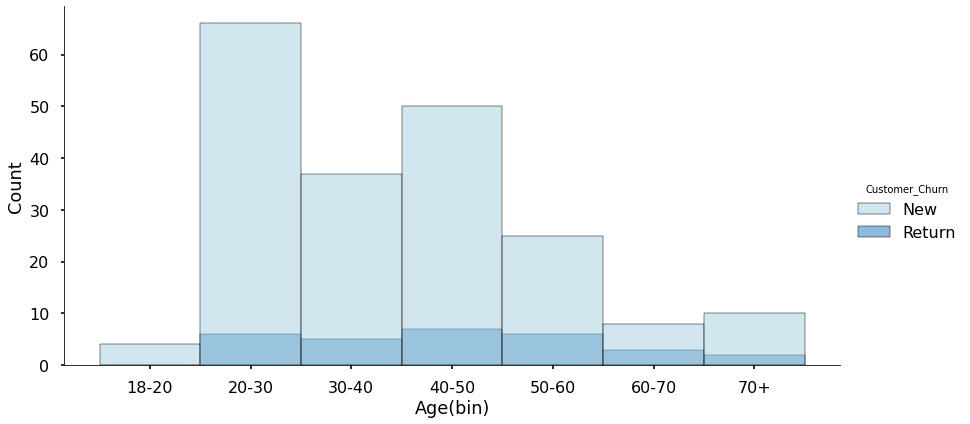

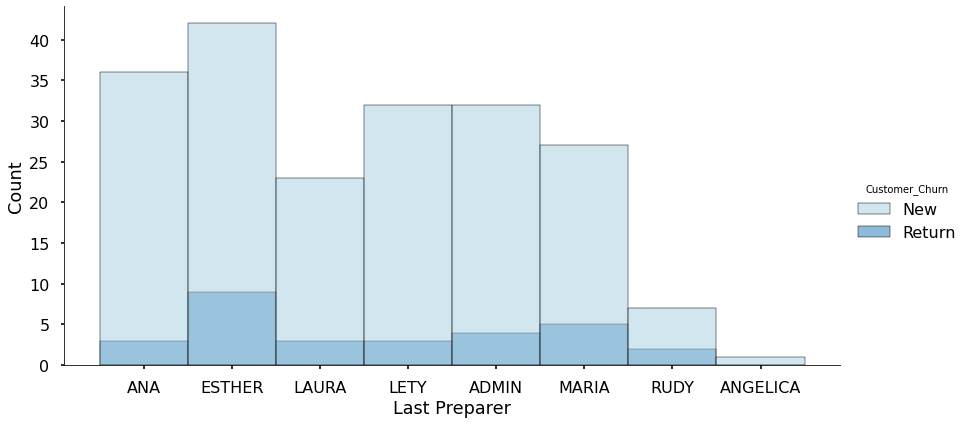

In [25]:
NvR = NvR.sort_values(['Age(bin)'], ascending=True)
sns.displot(NvR, x='Age(bin)', hue='Customer_Churn',height=6,aspect=2,palette='Paired')
sns.displot(NvR, x='Last Preparer', hue='Customer_Churn',height=6,aspect=2,palette='Paired');

<div class="alert alert-block alert-info">

The majority of new customers tend to be between the ages of 20-30 with returning customers being 40-60 years old. New and returning customers are mostly processed by Esther. 

</div>

### Adjusted Gross Income

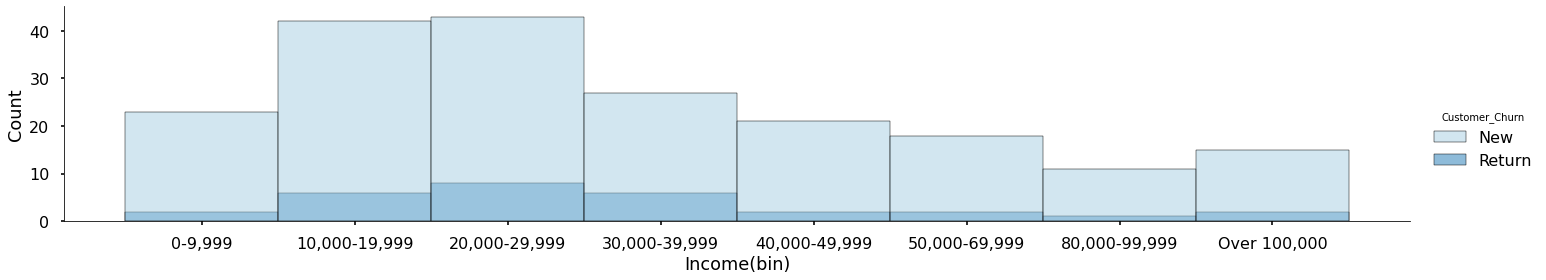

In [26]:
NvR = NvR.sort_values(['Income(bin)'], ascending=True)
sns.displot(NvR, x='Income(bin)', hue='Customer_Churn',height=4,aspect=5,palette='Paired');

<div class="alert alert-block alert-info">

The majority of customers have an adjusted gross income of 10,000-40,000 dollars. Return customers follow the same income trends.

</div>

### Household Income and Family Size

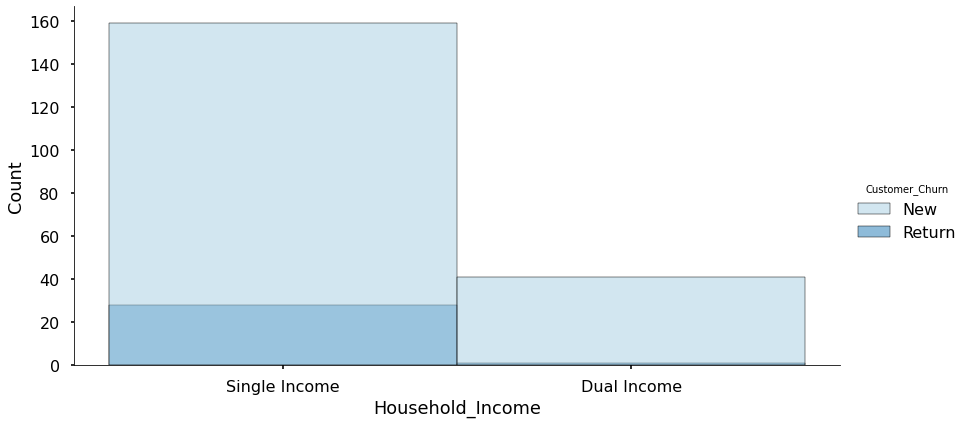

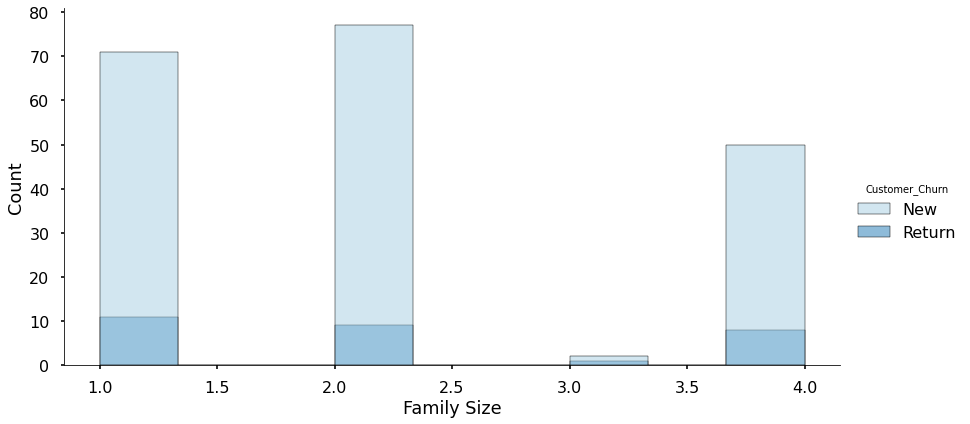

In [27]:
sns.displot(NvR, x='Household_Income', hue='Customer_Churn',height=6,aspect=2,palette='Paired')
sns.displot(NvR, x='Family Size', hue='Customer_Churn',height=6,aspect=2,palette='Paired');

<div class="alert alert-block alert-info">

The majority of new and return customers live in single income households. New customers typically have a family size of two while return customer's family sizes are closely distributed between sizes 1, 2 and 4 (smallest).

</div>

## Exploring Customer Churn

In [28]:
# Cleaning customer churn
df['Customer_Churn'] = df['Customer_Churn'].replace('return','No')

## Adjustments | Final Processing
#### Binary Columns | Updates for Machine Learning

In [29]:
# Dropping new customers in order to perform a fair assessment customer retention
df = df[df['Customer_Churn'] != 'New']

In [30]:
df2 = df.copy() # saving for final visualizations

#### Month & Day | Name to Numerical Value

In [31]:
# Converting months to numerical values
monthvals = {'April':4, 'March':3, 'June':6, 'February':2, 'January':1, 'August':8, 
             'September':9, 'May':5, 'July':7, 'October':10, 'November':11}

df['Month(Last)'] = df['Month(Last)'].replace(monthvals)

In [32]:
# Converting days to numerical values
dayvals = {'Tuesday':2, 'Thursday':4, 'Saturday':6, 'Monday':1, 'Sunday':7, 
           'Wednesday':3, 'Friday':5}
df['Day(Last)'] = df['Day(Last)'].replace(dayvals)

#### Income, Gender, Email and Customer Churn

In [33]:
df['Household_Income'] = df['Household_Income'].map(lambda s :1 if s == 'Single Income' else 2)
df['Gender'] = df['Gender'].map(lambda s :1 if s == 'MALE' else 0)
df['Email'] = df['Email'].map(lambda s :0 if s == 'No Email' else 1)

<div class="alert alert-block alert-info">

Categorical columns (Household_income, Gender, Email and Customer_Churn) are binary. As a result, they will be converted to zero's and one's in order to include them in our machine learning algorithm.

</div>

### Dropping Columns

In [34]:
df.drop(['ID','City','State','County','Occupation','Age(bin)','Client 2016','Client 2017',
         'Client 2018','Fee','Last Date','Customer Status','Income(bin)','Paid 2016',
         'Paid 2017','Paid 2018'],axis=1,inplace=True)

### Multicollinearity

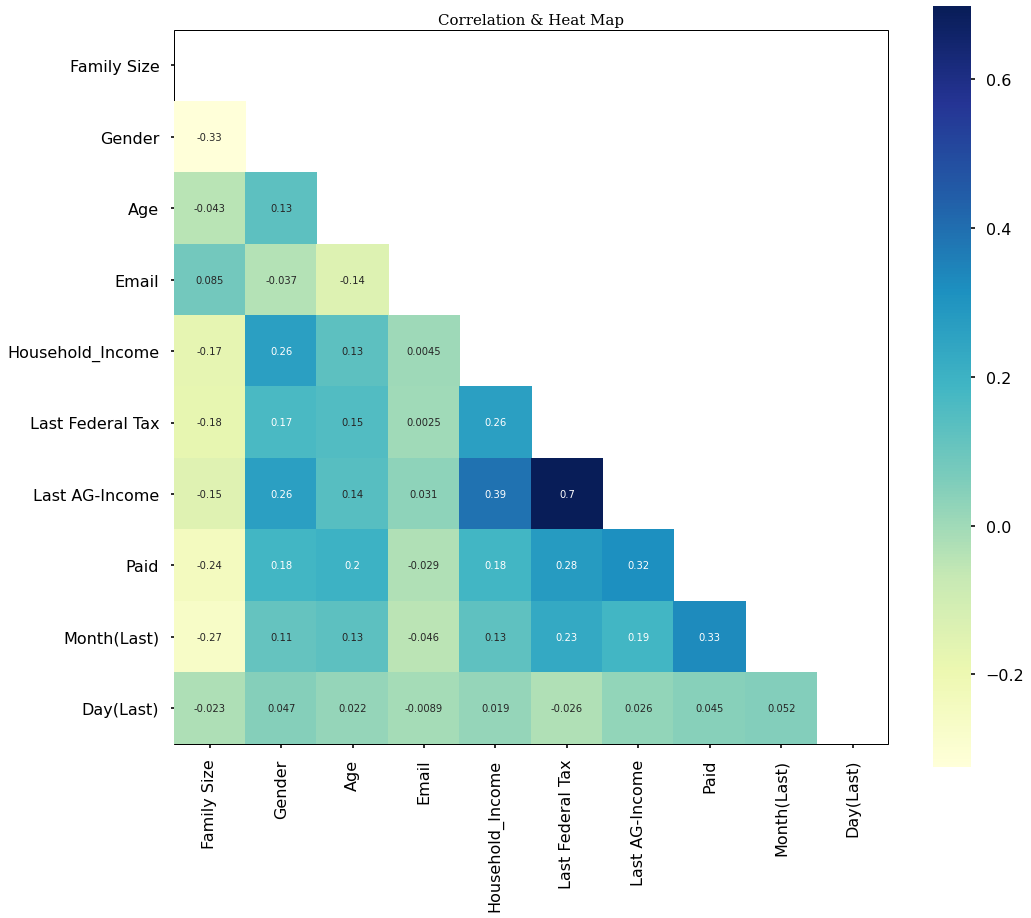

In [35]:
corr = df.corr() # analyzing correlation
fig, ax = plt.subplots(figsize=(16,14))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='YlGnBu')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
ax.set_title('Correlation & Heat Map', fontsize=15, fontfamily='serif')
plt.show()

<div class="alert alert-block alert-info">

The multicollinearity plot does not illustrate any column-to-column correlation over 0.75. As a result, no additional features will be dropped. 

</div>

## Target Variable

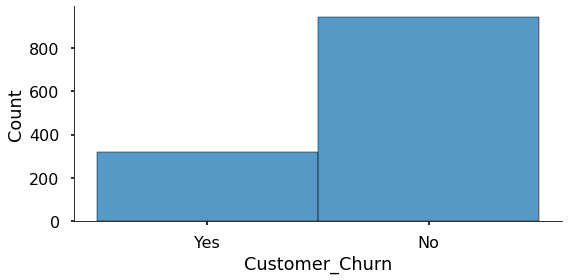

In [36]:
# Checking target class balance
sns.displot(df, x='Customer_Churn',height=4,aspect=2,palette='Paired');

# Model
## Sklearn | Gradient Boosting Classifier

In [37]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [38]:
def model_visuals (model, X_test, y_test):
    '''Plots the confusion matrix and ROC-AUC plot'''
    fig, axes = plt.subplots(figsize = (12, 6), ncols = 2)  # confusion matrix
    metrics.plot_confusion_matrix(model, X_test, y_test, normalize = 'true', 
                          cmap = 'Blues', ax = axes[0])
    axes[0].set_title('Confusion Matrix');
    # ROC-AUC Curve
    roc_auc = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].set_title('ROC-AUC Plot')
    axes[1].grid()
    axes[1].legend()
    fig.tight_layout()
    plt.show()

In [39]:
dataset = df.copy() # copy for Pycaret modeling

### One Hot Encode

In [40]:
# One Hot Encode
df = pd.get_dummies(df, drop_first=True)

In [41]:
# Converting uint8 datatypes back to categorical variables 
for cat_cols in df.select_dtypes('uint8').columns:
         df[cat_cols] = df[cat_cols].astype('category')

### Test-Train Split | Standardize

In [42]:
# Identify X, y
y = df['Customer_Churn_Yes']
X = df.drop(['Customer_Churn_Yes'], axis=1)

In [43]:
# Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [44]:
# Standardize the data
scaler = StandardScaler() # transform "X" features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy Percentage 77.17 

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       184
           1       0.64      0.40      0.49        70

    accuracy                           0.77       254
   macro avg       0.72      0.66      0.67       254
weighted avg       0.75      0.77      0.75       254
 




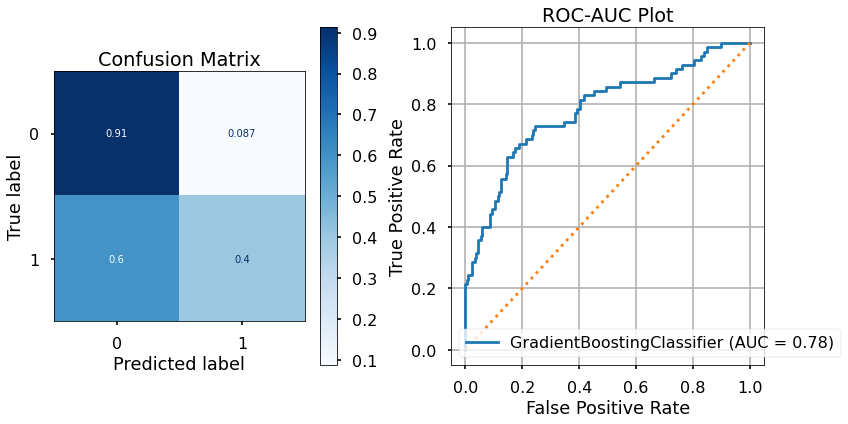

In [45]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train) # fit model
gb_prediction = gb_clf.predict(X_test)
gbclf_score = round(accuracy_score(gb_prediction, y_test)*100,2)
print('Accuracy Percentage', gbclf_score, '\n')
print(classification_report(y_test, gb_prediction), '\n\n')
model_visuals (gb_clf, X_test, y_test) # class report / plots

In [46]:
# # Feature Importance
# gb_model = gb_clf.fit(X_train, y_train)
# gb_feature = pd.DataFrame({'Importance': gb_model.feature_importances_, 'Column': X.columns})
# gb_feature = gb_feature.sort_values(by='Importance', ascending=False) 
# print('Gradient Boosting Top 25 Features')
# gb_feature[:25] # top 25 features

In [47]:
# gb_feature = gb_feature[:25] # top 25 features
# gb_feature.plot(kind='barh',x='Column',y='Importance',figsize=(20, 10),cmap='coolwarm')
# plt.title('Gradient Boosting Feature Importance \n', fontsize=16)
# plt.show()

## Tenserflow | Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
X_train.shape

(1013, 18)

In [50]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [51]:
model = Sequential()

model.add(Dense(21,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [52]:
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/500
32/32 [==============================] - 0s 4ms/step - loss: 0.8203 - val_loss: 0.6383
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 0.7445 - val_loss: 0.6245
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6809 - val_loss: 0.6180
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6724 - val_loss: 0.6120
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6449 - val_loss: 0.6060
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6403 - val_loss: 0.6057
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6211 - val_loss: 0.6040
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5973 - val_loss: 0.5997
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5909 - val_loss: 0.5968
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6060 - val_loss: 0.5975
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.4815 - val_loss: 0.5555
Epoch 84/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4872 - val_loss: 0.5546
Epoch 85/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4922 - val_loss: 0.5520
Epoch 86/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4728 - val_loss: 0.5530
Epoch 87/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4646 - val_loss: 0.5561
Epoch 88/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4661 - val_loss: 0.5585
Epoch 89/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4678 - val_loss: 0.5541
Epoch 90/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4650 - val_loss: 0.5532
Epoch 91/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4810 - val_loss: 0.5514
Epoch 92/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4832 - val_loss: 0.5492
Epoch 93/500


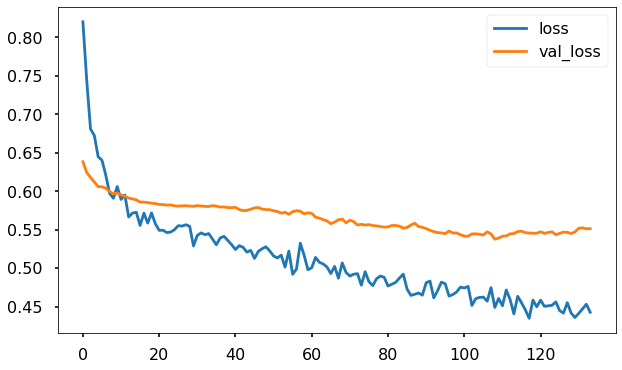

In [53]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(10,6));

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 21)                399       
_________________________________________________________________
dropout (Dropout)            (None, 21)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                396       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                285       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [55]:
# model.predict_classes(X_test)
predictions = model.predict_classes(X_test)

W1214 11:52:32.163205 4557942208 deprecation.py:323] From <ipython-input-55-a7db9e6d6317>:2: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       184
           1       1.00      0.11      0.21        70

    accuracy                           0.76       254
   macro avg       0.87      0.56      0.53       254
weighted avg       0.82      0.76      0.68       254



<div class="alert alert-block alert-info">

The gradient boosting classifier performed better overall than the neural network. Our analysis will continue using the results of the gradient boosting classifier through Pycaret's package for model tuning and feature importance. 

</div>

## Pycaret Multi-Model Analysis
Pycaret Resources: https://pycaret.org/create-model/

In [57]:
# Import pycaret
import pycaret.preprocess as preprocess
from pycaret.classification import *
import pycaret.preprocess as preprocess

#### Test-Train Split

In [58]:
# Test/Train Split
data = dataset.sample(frac=0.80, random_state=101) # train dataset
data_unseen = dataset.drop(data.index) # test dataset

data.reset_index(inplace=True, drop=True) # reset index
data_unseen.reset_index(inplace=True, drop=True) # reset index

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1014, 12)
Unseen Data For Predictions: (13, 12)


### Model Setup
#### Feature Conversion, Label Encoding, Normalizing & Class Imbalance

In [59]:
pycar = setup(data=data, target='Customer_Churn', session_id=123, normalize=True, 
                  n_jobs=-1, transformation=True, use_gpu=True, fix_imbalance=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(1014, 12)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


I1214 11:52:35.849510 4557942208 classification.py:1795] create_model_container 0
I1214 11:52:35.850198 4557942208 classification.py:1796] master_model_container 0
I1214 11:52:35.850669 4557942208 classification.py:1797] display_container 0
I1214 11:52:35.857234 4557942208 classification.py:1799] Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Customer_Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New

#### Model Comparison

In [60]:
# Compare All Models
compare_models();

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8265,0.8405,0.5608,0.6846,0.6062,0.4985,0.5086,1.9737
1,Gradient Boosting Classifier,0.8124,0.8401,0.6075,0.6255,0.6092,0.4873,0.4920,0.1602
2,Extreme Gradient Boosting,0.8096,0.8439,0.6186,0.6164,0.6122,0.4869,0.4906,0.1289
3,Light Gradient Boosting Machine,0.8039,0.8313,0.5382,0.6495,0.5705,0.4471,0.4613,0.3568
4,Extra Trees Classifier,0.7955,0.7902,0.4582,0.6182,0.5173,0.3937,0.4053,0.1441
5,Random Forest Classifier,0.7941,0.7772,0.4137,0.6267,0.4853,0.3677,0.3854,0.1123
6,Ada Boost Classifier,0.7785,0.8271,0.6118,0.5472,0.5732,0.4248,0.4299,0.0816
7,Logistic Regression,0.7418,0.8171,0.7657,0.4878,0.5930,0.4175,0.4443,0.0272
8,Decision Tree Classifier,0.7377,0.6557,0.4935,0.4848,0.4824,0.3087,0.3123,0.0077
9,Linear Discriminant Analysis,0.7320,0.8179,0.7546,0.4782,0.5826,0.4006,0.4261,0.0092


I1214 11:53:42.181345 4557942208 classification.py:2750] create_model_container: 1
I1214 11:53:42.182053 4557942208 classification.py:2751] master_model_container: 1
I1214 11:53:42.182680 4557942208 classification.py:2752] display_container: 2
I1214 11:53:42.183475 4557942208 classification.py:2754] <catboost.core.CatBoostClassifier object at 0x7f969326fa58>
I1214 11:53:42.184056 4557942208 classification.py:2755] compare_models() succesfully completed......................................


### Gradient Boosting Classifier

In [61]:
GBC = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7887,0.8019,0.6111,0.5789,0.5946,0.4519,0.4522
1,0.7606,0.8229,0.3889,0.5385,0.4516,0.3035,0.3101
2,0.7746,0.7872,0.3889,0.5833,0.4667,0.3310,0.3419
3,0.9014,0.9224,0.8333,0.7895,0.8108,0.7442,0.7447
4,0.7887,0.8417,0.6667,0.5714,0.6154,0.4709,0.4736
5,0.8592,0.8658,0.8333,0.6818,0.7500,0.6533,0.6597
6,0.8028,0.8159,0.4706,0.6154,0.5333,0.4111,0.4171
7,0.8592,0.8780,0.5882,0.7692,0.6667,0.5794,0.5878
8,0.7887,0.7854,0.5882,0.5556,0.5714,0.4314,0.4317
9,0.8000,0.8801,0.7059,0.5714,0.6316,0.4964,0.5016


I1214 11:53:45.134516 4557942208 classification.py:3683] create_model_container: 2
I1214 11:53:45.135096 4557942208 classification.py:3684] master_model_container: 2
I1214 11:53:45.135776 4557942208 classification.py:3685] display_container: 3
I1214 11:53:45.136923 4557942208 classification.py:3687] GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
I12

### Model Tuning

In [62]:
tuned_GBC = tune_model(GBC, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8310,0.7778,0.5556,0.7143,0.6250,0.5181,0.5249
1,0.7042,0.7631,0.2778,0.3846,0.3226,0.1396,0.1427
2,0.7887,0.8134,0.3333,0.6667,0.4444,0.3315,0.3618
3,0.8451,0.9015,0.6667,0.7059,0.6857,0.5830,0.5834
4,0.7465,0.7893,0.5556,0.5000,0.5263,0.3539,0.3548
5,0.8310,0.8512,0.7778,0.6364,0.7000,0.5840,0.5897
6,0.7606,0.7571,0.3529,0.5000,0.4138,0.2689,0.2754
7,0.8310,0.8813,0.5294,0.6923,0.6000,0.4953,0.5024
8,0.7887,0.7930,0.5294,0.5625,0.5455,0.4080,0.4083
9,0.8429,0.8335,0.6471,0.6875,0.6667,0.5640,0.5644


I1214 11:53:53.033601 4557942208 classification.py:4997] create_model_container: 3
I1214 11:53:53.034223 4557942208 classification.py:4998] master_model_container: 3
I1214 11:53:53.034927 4557942208 classification.py:4999] display_container: 4
I1214 11:53:53.036240 4557942208 classification.py:5001] GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=60,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.45000000000000007,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           

In [63]:
print(tuned_GBC)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=60,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.45000000000000007,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Validation

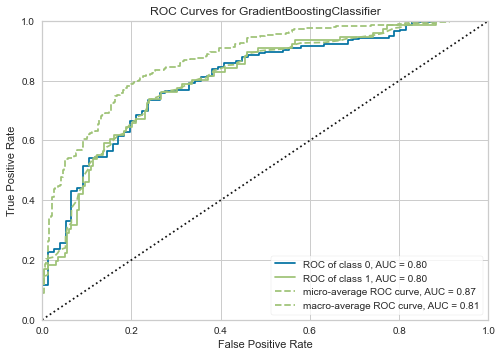

I1214 11:53:53.353804 4557942208 classification.py:7699] Visual Rendered Successfully
I1214 11:53:53.354629 4557942208 classification.py:8171] plot_model() succesfully completed......................................


In [64]:
plot_model(tuned_GBC, plot = 'auc')

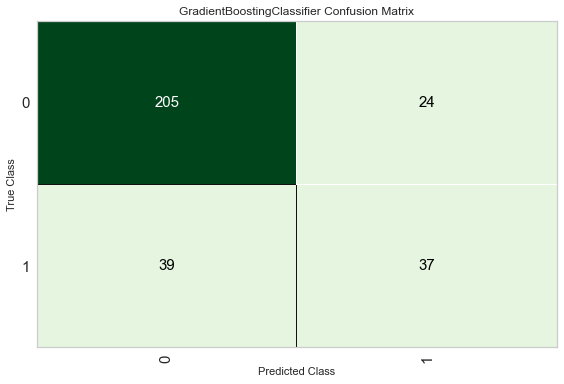

I1214 11:53:53.521432 4557942208 classification.py:7771] Visual Rendered Successfully
I1214 11:53:53.522346 4557942208 classification.py:8171] plot_model() succesfully completed......................................


In [65]:
plot_model(tuned_GBC, plot = 'confusion_matrix')

In [66]:
# Final check using the unseen data / test
predict_model(tuned_GBC);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7934,0.8048,0.4868,0.6066,0.5401,0.409,0.4131


In [67]:
# Predicting using the unseen data
# unseen_predictions = predict_model(tuned_GBC, data=data_unseen)

# Final Model

In [68]:
# Final Model / trained on the complete dataset
final_GBC = finalize_model(tuned_GBC)

I1214 11:53:53.918097 4557942208 classification.py:2895] Initializing create_model()
I1214 11:53:53.919259 4557942208 classification.py:2897] create_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=60,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.45000000000000007,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False), ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
I1214 11:53:53.919

I1214 11:53:57.713421 4557942208 classification.py:9937] master_model_container: 4
I1214 11:53:57.714011 4557942208 classification.py:9938] display_container: 6
I1214 11:53:57.714966 4557942208 classification.py:9940] GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=60,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.45000000000000007,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
I1214 11:53:57.715605 4557942208 classification.py:9941] finalize

#### Final Model Results

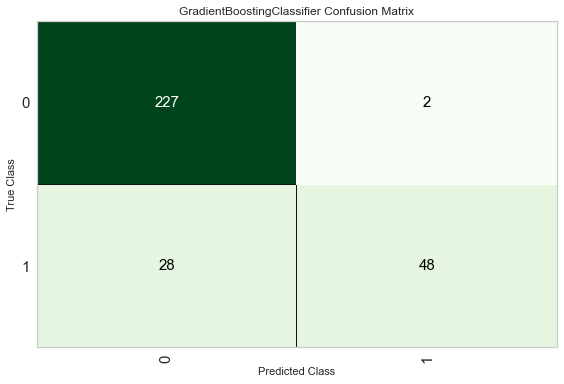

I1214 11:53:57.854493 4557942208 classification.py:7771] Visual Rendered Successfully
I1214 11:53:57.855201 4557942208 classification.py:8171] plot_model() succesfully completed......................................


In [69]:
plot_model(final_GBC, plot = 'confusion_matrix')

In [70]:
evaluate_model(final_GBC)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Feature Importance

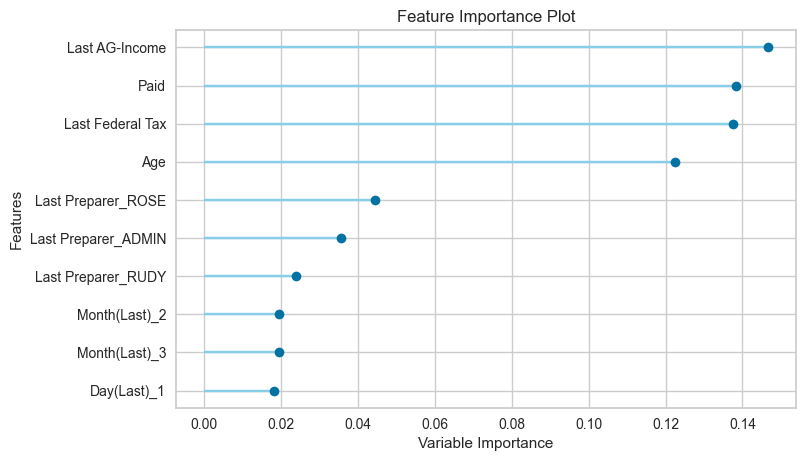

I1214 11:53:58.120408 4557942208 classification.py:8162] Visual Rendered Successfully
I1214 11:53:58.121278 4557942208 classification.py:8171] plot_model() succesfully completed......................................


In [71]:
plot_model(final_GBC, plot='feature')

## SHAP | Predictive Features

I1214 11:53:58.126058 4557942208 classification.py:8333] Initializing interpret_model()
I1214 11:53:58.127058 4557942208 classification.py:8335] interpret_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=60,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.45000000000000007,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False), plot=summary, feature=None, observation=None)
I1214 11:53:58.127671 4557942208 classification.py:8337] Checking

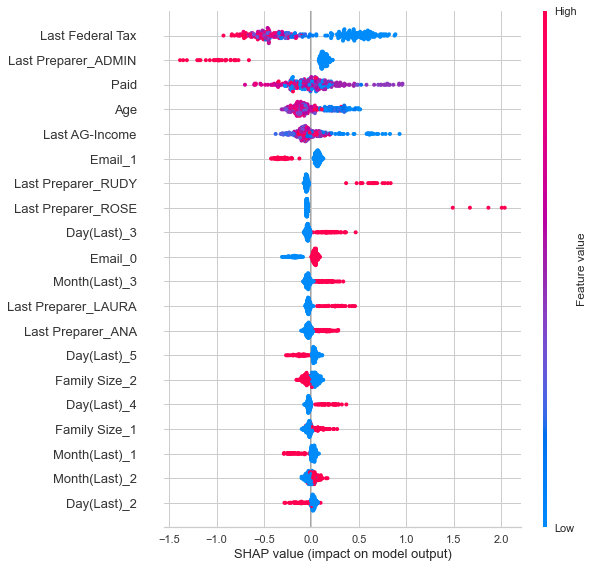

I1214 11:53:59.717645 4557942208 classification.py:8410] Visual Rendered Successfully
I1214 11:53:59.718431 4557942208 classification.py:8519] interpret_model() succesfully completed......................................


In [72]:
# Interpret model | SHAP
interpret_model(final_GBC)

<div class="alert alert-block alert-info">

The top features influencing customer churn are Federal Tax Owed, Paid, Last AG-Income, Age, Last Day (Wednesday & Thursday), Last Month (March & April) and Preparer.

</div>

## Visualizing Important Features

### Federal Tax & Adjusted Gross Income & Family Size

In [73]:
# Binning Values for Visualization
df2['Fed Tax (bin)'] = df2['Last Federal Tax'].apply(lambda x: '0-1000' if x < 1000
                                                     else '1000-2000' if x < 2000 
                                                     else '2000-3000' if x < 3000
                                                     else '3000-4000' if x < 4000
                                                     else '4000-5000' if x < 5000
                                                     else '5000-6000' if x < 6000
                                                     else '7000-8000' if x < 8000
                                                     else '9000-15000' if x < 15000
                                                     else 'Over-15000' if x < 25000 
                                                     else 'Over-25000')

In [74]:
# Reducing labels for visualizations
incomevals = {'30,000-39,999':'30K-40K','10,000-19,999':'10K-20K','20,000-29,999':'20K-30K',
              '0-9,999':'0-10K','50,000-69,999':'50K-70K','40,000-49,999':'40K-50K',
              'Over 100,000':'Over 100K','80,000-99,999':'80K-100K'}

df2['Income (Thousands)'] = df2['Income(bin)'].replace(incomevals)

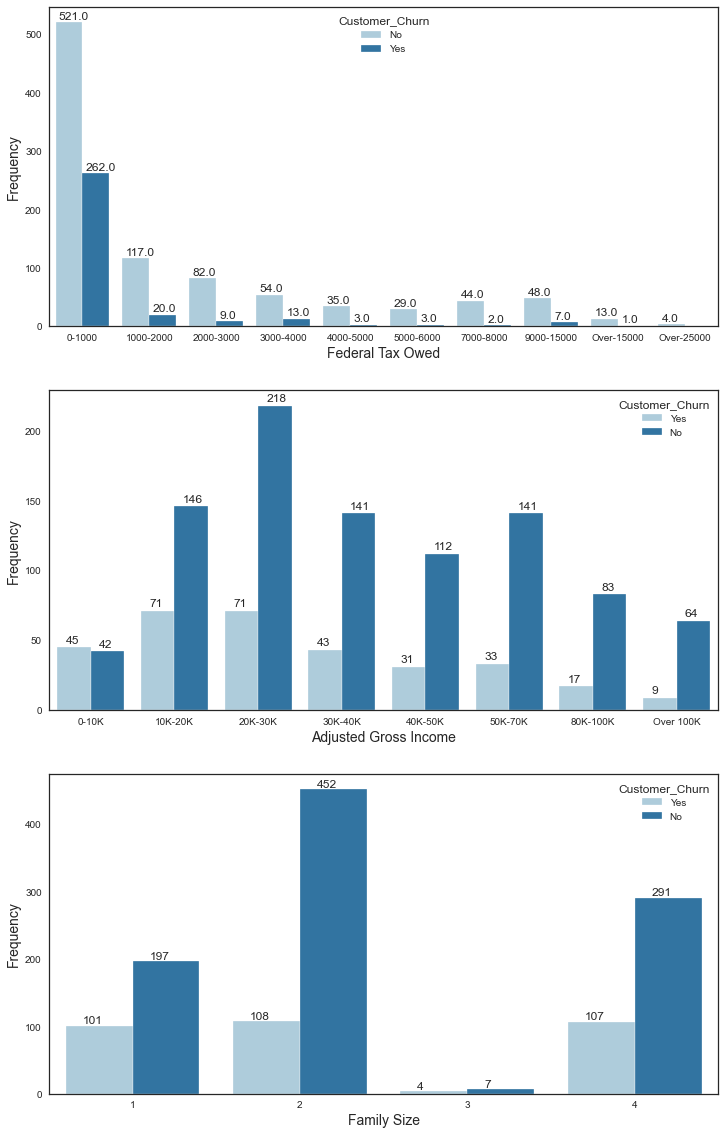

In [75]:
sns.set_style('ticks')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,20))

df2 = df2.sort_values(['Fed Tax (bin)'], ascending=True)
ax1 = sns.countplot(x='Fed Tax (bin)', data=df2, hue='Customer_Churn', palette='Paired', ax=ax[0])
ax1.set_xlabel('Federal Tax Owed', fontdict={'fontsize': 14})
ax1.set_ylabel('Frequency', fontdict={'fontsize': 14})
for p in ax1.patches:
        ax1.annotate(p.get_height(),(p.get_x()+0.05, p.get_height()+5))

df2 = df2.sort_values(['Income (Thousands)'], ascending=True)
ax2 = sns.countplot(x='Income (Thousands)', data=df2, hue='Customer_Churn', palette='Paired',ax=ax[1])
ax2.set_xlabel('Adjusted Gross Income', fontdict={'fontsize': 14})
ax2.set_ylabel('Frequency', fontdict={'fontsize': 14})
for p in ax2.patches:
        ax2.annotate(p.get_height(),(p.get_x()+0.1, p.get_height()+3))

df2 = df2.sort_values(['Family Size'], ascending=True)
ax3 = sns.countplot(x='Family Size', data=df2, hue='Customer_Churn', palette='Paired',ax=ax[2])
ax3.set_xlabel('Family Size', fontdict={'fontsize': 14})
ax3.set_ylabel('Frequency', fontdict={'fontsize': 14})
for p in ax3.patches:
        ax3.annotate(p.get_height(),(p.get_x()+0.1, p.get_height()+3))

plt.show()

<div class="alert alert-block alert-info">
    
* Federal Tax Owed

The most significant customer churn occurs in customers that owe the federal government between 0-2000 dollars as a result of their tax preparation. 

</div>

<div class="alert alert-block alert-info">
    
* Adjusted Gross Income and Family Size

The most significant customer churn occurs in customers that have an adjusted gross income of 0-20,000 dollars. Family size is being observed because the number of dependents a family has directly influences adjusted gross income through additional tax breaks (more tax free income, lowering the adjusted gross income value directly). 

* Note: Dependent tax break values vary from year to year but a value 5,000 dollars per dependent child is an appropriate estimate. This leads me to include the 20,000-30,000 adjusted gross income bin as 'significant churn'.

</div>

### Age, Day (Last) & Month (Last)

In [76]:
# Converting days for sorted visual
dayvals = {'Tuesday':'2-Tuesday','Thursday':'4-Thursday','Saturday':'6-Saturday',
           'Monday':'1-Monday','Sunday':'7-Sunday','Wednesday':'3-Wednesday',
           'Friday':'5-Friday'}
df2['Day(Last)'] = df2['Day(Last)'].replace(dayvals)

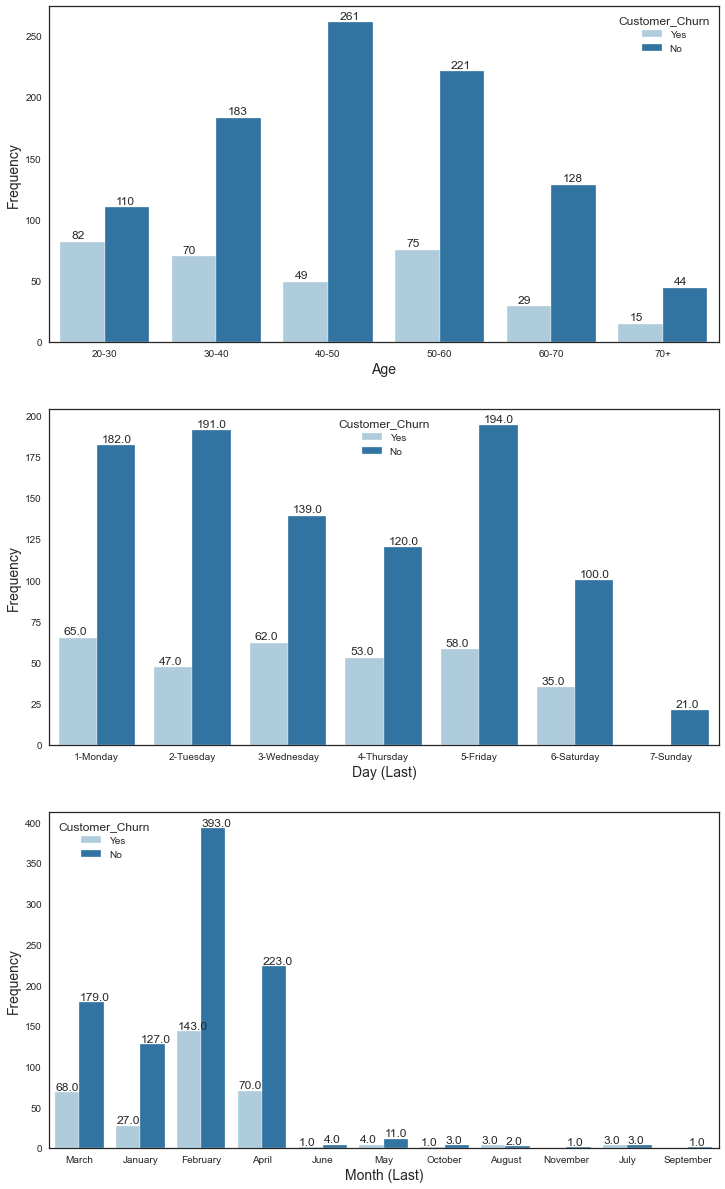

In [77]:
sns.set_style('ticks')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,21))

df2 = df2.sort_values(['Age(bin)'], ascending=True)
ax1 = sns.countplot(x='Age(bin)', data=df2, hue='Customer_Churn', palette='Paired', ax=ax[0])
ax1.set_xlabel('Age', fontdict={'fontsize': 14})
ax1.set_ylabel('Frequency', fontdict={'fontsize': 14})
for p in ax1.patches:
        ax1.annotate(p.get_height(),(p.get_x()+0.1, p.get_height()+3))

df2 = df2.sort_values(['Day(Last)'], ascending=True)
ax2 = sns.countplot(x='Day(Last)', data=df2, hue='Customer_Churn', palette='Paired',ax=ax[1])
ax2.set_xlabel('Day (Last)', fontdict={'fontsize': 14})
ax2.set_ylabel('Frequency', fontdict={'fontsize': 14})
for p in ax2.patches:
        ax2.annotate(p.get_height(),(p.get_x()+0.05, p.get_height()+2))

ax3 = sns.countplot(x='Month(Last)', data=df2, hue='Customer_Churn', palette='Paired',ax=ax[2])
ax3.set_xlabel('Month (Last)', fontdict={'fontsize': 14})
ax3.set_ylabel('Frequency', fontdict={'fontsize': 14})
for p in ax3.patches:
        ax3.annotate(p.get_height(),(p.get_x()+0.01, p.get_height()+3))

plt.show()

<div class="alert alert-block alert-info">
    
* Age

The most significant customer churn occurs in customers that are between 20 and 30 years of age.

</div>

<div class="alert alert-block alert-info">
    
* Day (Last)

The highest traffic days are Monday, Tuesday and Friday. The most significant customer churn occurs on Wednesday and Thursday.

* Month (Last)

The highest customer traffic occurs in February. The most significant customer churn occurs during March. 

</div>

### Paid and Last Preparer Admin

In [78]:
# Binning paid values for visualization
df2['Paid(bin)'] = df2['Paid'].apply(lambda x: '0-99' if x < 100
                                     else '100-119' if x < 120
                                     else '120-149' if x < 150
                                     else '150-179' if x < 180
                                     else '180-199' if x < 200
                                     else '200-249' if x < 250
                                     else '250-299' if x < 300
                                     else '300+')

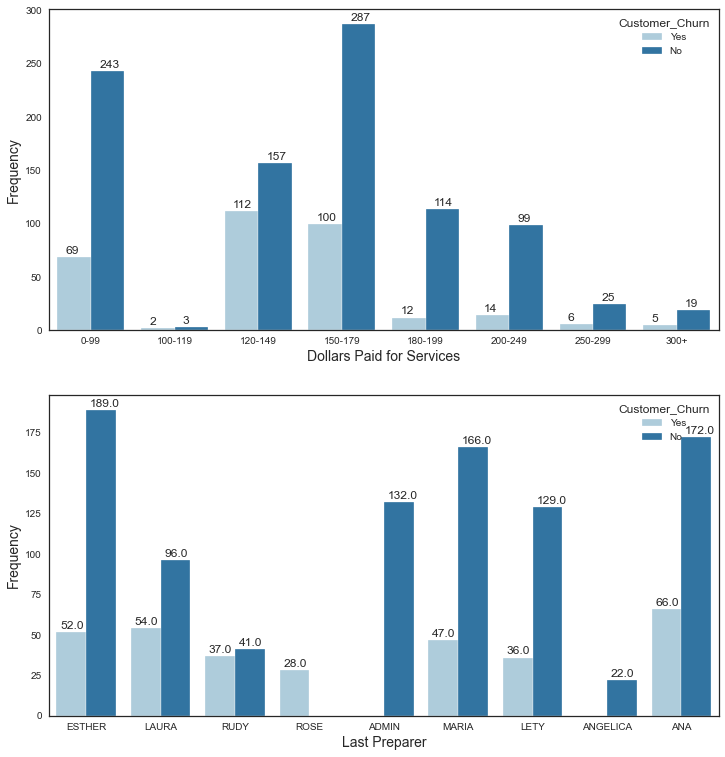

In [79]:
sns.set_style('ticks')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,13))

df2 = df2.sort_values(['Paid(bin)'], ascending=True)
ax1 = sns.countplot(x='Paid(bin)', data=df2, hue='Customer_Churn', palette='Paired', ax=ax[0])
ax1.set_xlabel('Dollars Paid for Services', fontdict={'fontsize': 14})
ax1.set_ylabel('Frequency', fontdict={'fontsize': 14})
for p in ax1.patches:
        ax1.annotate(p.get_height(),(p.get_x()+0.1, p.get_height()+3))

ax2 = sns.countplot(x='Last Preparer', data=df2, hue='Customer_Churn', palette='Paired',ax=ax[1])
ax2.set_xlabel('Last Preparer', fontdict={'fontsize': 14})
ax2.set_ylabel('Frequency', fontdict={'fontsize': 14})
for p in ax2.patches:
        ax2.annotate(p.get_height(),(p.get_x()+0.05, p.get_height()+2))

plt.show()

<div class="alert alert-block alert-info">
    
* Paid

The most significant customer churn occurs when customers pay between 100-150 dollars for services.

</div>

<div class="alert alert-block alert-info">

* Last Preparer

The last preparer feature has additional factors that need to be considered. Preparer Rose no longer works for the company. Preparer Rudy has been dealing with significant health problems over the last several years which have caused him to work less hours from year to year. As such, both of these individuals will see significant customer churn due to outside factors.  

Admin preparers typically deal with new customers that have simple returns. Ultimately each return is reviewed by a preparer and many times recoded in their name. This fact significantly effects the way customer churn is interpreted as these individuals serve more as data entry than as tax preparers. 

In addition, some preparers work part time, some full time and traffic is directed based on seniority and day-to-day needs. New preparers (Laura and Angelica) are many times in charge of taking the customers who may have been serviced by Rose or Rudy (as a result of their business changes) and the change in familiar face may influence a customer's decision to return. 

It is worth noting that of the preparers with seniority (Esther, Lety, Maria and Ana), Ana has the most significant customer churn. Due to many of the mentioned features, Last Preparer will not be included in the final business recommendations. 

</div>

# Interpret Results, Insights and Future Work

### Conclusions | Clustering (Customer Segmentation)
The dataset offered various consumer trends and illustrated multiple areas of opportunity. Please see our jupyter notebook 'Clustering.ipynb' for additional analysis.

Three Clusters
The three segment group offered additional insight into customer trends. Cluster (1) represented the highest customer churn with client features (average values) that include:
* Smaller family sizes, if married no kids
* Single income households
* Second in income and tax owed (values very similar to cluster (2) with lowest values)
* Second in fees charged - twice as much as the average value for cluster 2 (similar income/tax owed).
* Processed late in the week, typically in late February/early March

This demographic is should be highly represented when creating any targeted marketing campaigns in the new year. 

### Conclusions | Customer Churn
* Customers that owe the government between 0 and 1000 dollars as a result of their tax preparation represent the most significant customer churn with respect to tax owed. 
* Customers that file with an adjusted gross income (taxable income) of 0-30,000 dollars represent the most significant churn with respect to AGI. Note: family size has a direct impact on taxable income.
* The most significant customer churn occurs in clients between the ages of 20 and 30.
* Of clients who leave the office, the majority of them have their last transaction during the month of February. Ratio-wise the month of March illustrates the most significant customer loss with approximately 38 percent customer churn. 
* Customer churn is closely distributed across every day of the week with the exception of Sunday. Sunday illustrates no customer churn but reveals a dramatic decrease in the number of transactions completed. 
* Customers that pay between 100 and 150 dollars for services represent the most significant customer churn with respect to fees paid for services. 

## Business Recommendations

<div class="alert alert-block alert-info">
    
Recommendation 1 

The tax office needs to target younger consumers, specifically those that are between 20-30 years old and live in single income households. To help build rapport with the younger demographic, the Tax office should begin offering financial wellness checks to those that are interested. A simple check of finances, plans for retirement and other provided resources can go along way when looking to build trust with a client base.

Recommendation 2

In addition, the office should invest in video conferencing software such as Zoom, GoToMeeting or Google Meet in order to offer alternative methods of tax preparation to their client base and offer a user friendly approach to their younger demographic.  

Recommendation 3

The office should attempt to redistribute its client flow with an emphasis on clients that do business in March. The customer segmentation analysis illustrated customer churn occurring in clients that are mid-range age and live in single income households. This leads me to believe that the younger, single income dependent demographic is electing to physically wait in the office for services and are processed by the first preparer available as opposed to having an administrative representative complete the return and scheduling a follow up call with a seasoned preparer after review. This process currently exists in the office but is not practiced on this demographic and is reserved for high profile clients who choose to not spend hours waiting in the office. Implementing this practice on the younger demographic should yield positive results as these individuals may be impatient or frustrated from taking significant time away from work for this transaction.

Recommendation 4

Sundays should be leveraged to redistribute a significant portion of the tax season traffic. Whether its an outreach program to redistribute clients or a day set for only video conferencing based preparations, Sunday should be leveraged to implement the first two recommendations above. 


Recommendation 5

Lastly, the office should reclassify its fees. The most amount of churn occurs at paid values of 100-150 dollars and from conversations held with the owner, this range is held for returns that are more complicated than a standard return but not complicated enough to merit higher prices which are reserved for returns with specific qualities (businesses, multiple state, large investments, estate preparations, etc). Breaking out this general (not simple) category into preparations that hold specific qualities and pricing based on these updates may give the owner some clarity on what merits a higher price and what doesn't. Transparency with the client may help them understand why they are paying a certain fee and a breakdown may offer opportunities for price discounts in some of these returns that are classified as not simple but are not complicated, yielding lower individual prices for many of the clients that fall into this category. 

</div>

### Future Work | Limitations

Unfortunately, the tax office maintains poor record keeping practices and as a result potentially significant features were unusable. An example of this was the occupation feature which maintained an enormous amount of unique features as a result of misspelling, mislabeling or simply not including the information. In addition, this analysis was limited by the missing 2020 tax year returns which were not provided.

Future work should include a more comprehensive amount of data per client. This data is normally provided by clients but was not provided by the owner due to the sensitivity of the information. Examples include, amount of jobs worked, a breakdown of earnings further than adjusted gross income (taxable wages, earnings on investments, etc.), as well as a health care status (having vs. not having). There are a significant amount of public resources that the office can provide their clients in order to build rapport and earn new business through referrals. This can even lead to additional income as Medicare (health insurance for those over 65) is a profitable endeavor with peak months occurring from October - December (during the offices slowest months).

# Notebooks
Please see our jupyter notebooks 'Data_Cleaning.ipynb' and 'Clustering.ipynb' for data cleaning and additional analysis.